In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("datasets\\1-studyhours.csv")

In [3]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


In [5]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


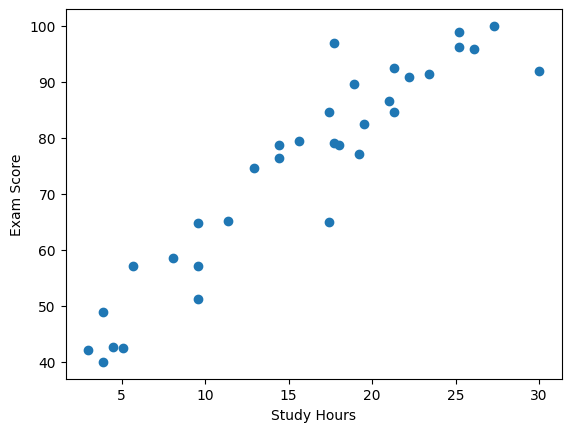

In [6]:
plt.scatter(df['Study Hours'],df['Exam Score'])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show() 

In [7]:
# independent and dependent features 
# tek parantez yapınca series geliyor fakat biz girdiyi dataframe istiyoruz iki parantez yapıyoruz
#X = df['Study Hours'] 
X = df[['Study Hours']]  # double brackets to keep it as a DataFrame
y = df['Exam Score']     # single bracket is enough for Series

In [8]:
type(X)

pandas.core.frame.DataFrame

In [9]:
type(y) 

pandas.core.series.Series

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardization - Rescaling methods
##### The data is centered at zero
##### ✨Balanced feature values
##### ✨Efficient gradient descent 

In [12]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

### Fit - calculating standardization (µ: mean, σ : standard deviation)
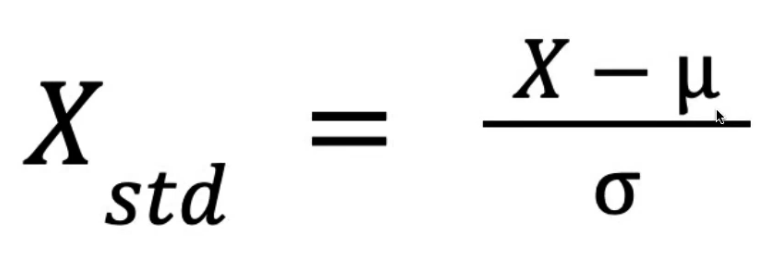

#### Scaler (Ölçekleyici): Veriyi standart hale getiren bir "kural kitabı". Örneğin, "bu sınıftaki notların ortalaması 70, standart sapması 10'dur" gibi kurallar içerir.


In [14]:
X_train = scaler.fit_transform(X_train) # fit_transform fits the scaler to the training data and transforms it
X_test = scaler.transform(X_test)       # fit is not called again, only transform is used on test data ->data leakage önleniyor

##### Modelin X_test ile ilgili bir şey bilmesini istemiyoruz bu yüzden fit işlemi yapmıyoruz.Çünkü test setinin, ölçeklendirme kurallarını (örneğin ortalama, min/max değerleri) öğrenme sürecine dahil olmasını istemeyiz. Test seti, modelin daha önce hiç görmediği, tamamen yabancı verileri ne kadar iyi tahmin ettiğini ölçmek için vardır.

##### fit(): Sadece eğitim verisinden (X_train) kuralları (ortalama, min/max vb.) öğrenir.

##### transform(): Öğrenilmiş bu kuralları hem eğitim (X_train) hem de test (X_test) verisine uygular.

##### scaler.fit(X_test) komutunu çalıştırdığınız anda, ölçekleyiciniz (scaler) test setinin içine bakar ve onun istatistiksel özelliklerini öğrenir.

In [15]:
X_train # transformed data 0 - 1 range

array([[-0.89166498],
       [ 1.91959769],
       [-1.43081124],
       [-0.08294558],
       [-1.19974856],
       [ 0.37917979],
       [ 1.57300366],
       [ 1.41896187],
       [-0.69911274],
       [-0.69911274],
       [-1.35379035],
       [ 0.57173203],
       [-0.46805005],
       [ 0.07109621],
       [-1.54634258],
       [ 1.07236785],
       [-0.08294558],
       [ 0.3021589 ],
       [-1.27676945],
       [ 0.53322158],
       [-1.43081124],
       [ 0.49471113],
       [ 0.91832606],
       [ 0.80279471],
       [ 0.76428427],
       [ 0.34066934]])

## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regression = LinearRegression()

In [18]:
# n_jobs: -1 means using all available cores for parallel processing
regression.fit(X_train, y_train)  # fit the model to the training data

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
print("Intercept:", regression.intercept_)
print("Coefficient:", regression.coef_)

Intercept: 71.58461538461538
Coefficient: [17.77325513]


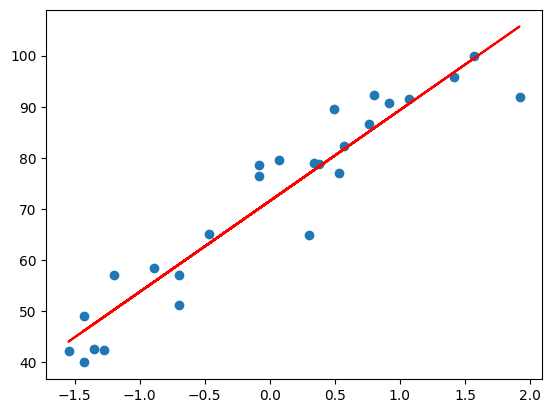

In [20]:
plt.scatter(X_train, y_train) # gerçeğin kendisi (ground truth)
plt.plot(X_train, regression.predict(X_train), "r") # predicted values
plt.show()

# Gerçek veri noktalarının (scatter)
# tahmin doğrusunu (plot)

In [21]:
regression.predict([[20]]) # dataframe expected input, so we use double brackets

# unscale data: regression.predict([[20]])

array([427.04971807])

In [22]:
regression.predict([[20]]) # data should be in the same scale as training data

array([427.04971807])

In [23]:
regression.predict(scaler.transform([[20]])) # scaling the input before prediction

d:\Data Science Udemy\ML\ML-Codes\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([82.8869146])

In [24]:
# DataFrame formatında veri gönder (sütun ismi ile)
test_data = pd.DataFrame([[20]], columns=['Study Hours'])
scaler.transform(test_data)  # direkt numeric input ile uyarı alırız, DataFrame ile gönderirsek uyarı almayız
regression.predict(scaler.transform(test_data))

# regression.predict([[20]]) # bu şekilde uyarı alırız

array([82.8869146])

## Performance Metrics
1) R^2 - Adjusted R^2  ->  R^2 değeri, modelin veriye ne kadar iyi uyduğunu ölçer

• R2: Modelin doğruluğunu ölçer ancak gereksiz değişkenleri ayırt edemez.

• Adjusted R2: Anlamsız değişkenleri cezalandırır.

• Her zaman hem R^2 hem de Adjusted R^2 değerlendirilmelidir.

2) MSE, MAE, RMSE

Genellikle bazı modelleri birbiriyle kıyaslarken kullanılır

In [25]:
# prediction test data
y_pred_test = regression.predict(X_test)

In [26]:
y_pred_test

array([94.75081875, 77.63941854, 59.15910631, 66.6881224 , 94.75081875,
       76.95496253, 85.85289064])

In [27]:
y_test

31    96.2
15    97.0
26    64.8
17    74.7
8     99.0
9     84.6
19    84.7
Name: Exam Score, dtype: float64

In [28]:
prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
prediction_df

,Actual,Predicted
31,96.2,94.750819
15,97.0,77.639419
26,64.8,59.159106
17,74.7,66.688122
8,99.0,94.750819
9,84.6,76.954963
19,84.7,85.852891


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

78.68191446465701
6.7870919092666515
8.870282659794839


In [31]:
score=r2_score(y_test,y_pred_test)
print("R2 Score:", score)

R2 Score: 0.4349170848122318


In [32]:
#adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3219005017746781